# Unsupervised Learning

* When you don't have data labels
* Experience a dataset containing many features to learn a useful structure of that dataset 

# Clustering Algorithms

* Attempts to find similar groupings within your dataset

## K-means clustering

* Tries to cluster data into n groups of equal variance by minimizing the *inertia* or within-cluster sum-of-squares
$$\sum_{i=0}^{n}\min_{\mu_{j} \in C}(||x_i-\mu_j||^2)$$
where $\mu_j$ is the mean of the samples in the cluster

* This obviously is not a great metric and fails a lot ...

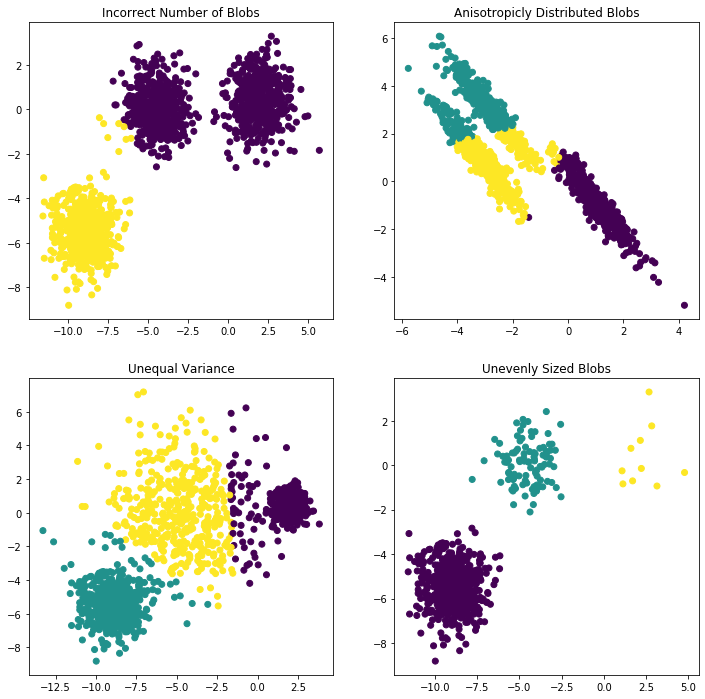

In [1]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## How it works?

1. Selects the initial points of the centroid

Loops around two more steps
1. Assigns each sample to its nearest centroid
2. Computes the new centroid based on the mean

This process is repeated until it reaches some threshold value

## Visualizing K-means Clustering

Text(0.98, 0.98, 'Final Clustering')

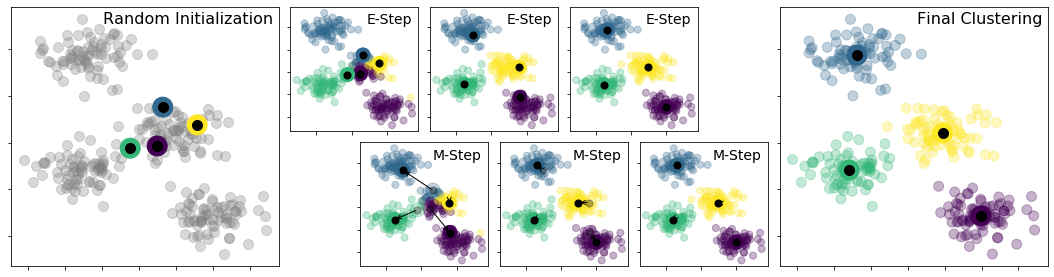

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


### Clustering Example

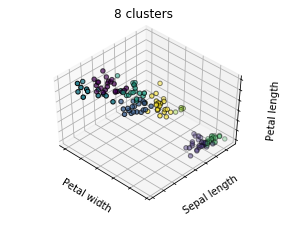

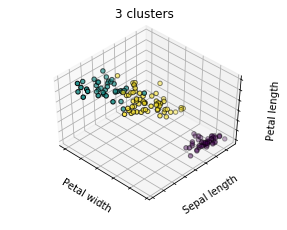

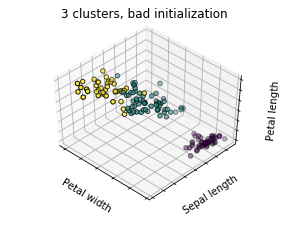

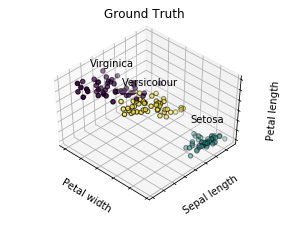

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

## Hierarchical Agglomerative Clustering 

* Clustering algorithms which build clusters based on a hierarchy
    - Agglomerative - Bottom-up approach where each observation starts as its own cluster and then merges together
        - Fast when there are a large number of clusters
    - Divisive - Top-down approach where all observations start as one cluster which is split iterativley. 
        - Slow when there are a large number of clusters

In [4]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [5]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

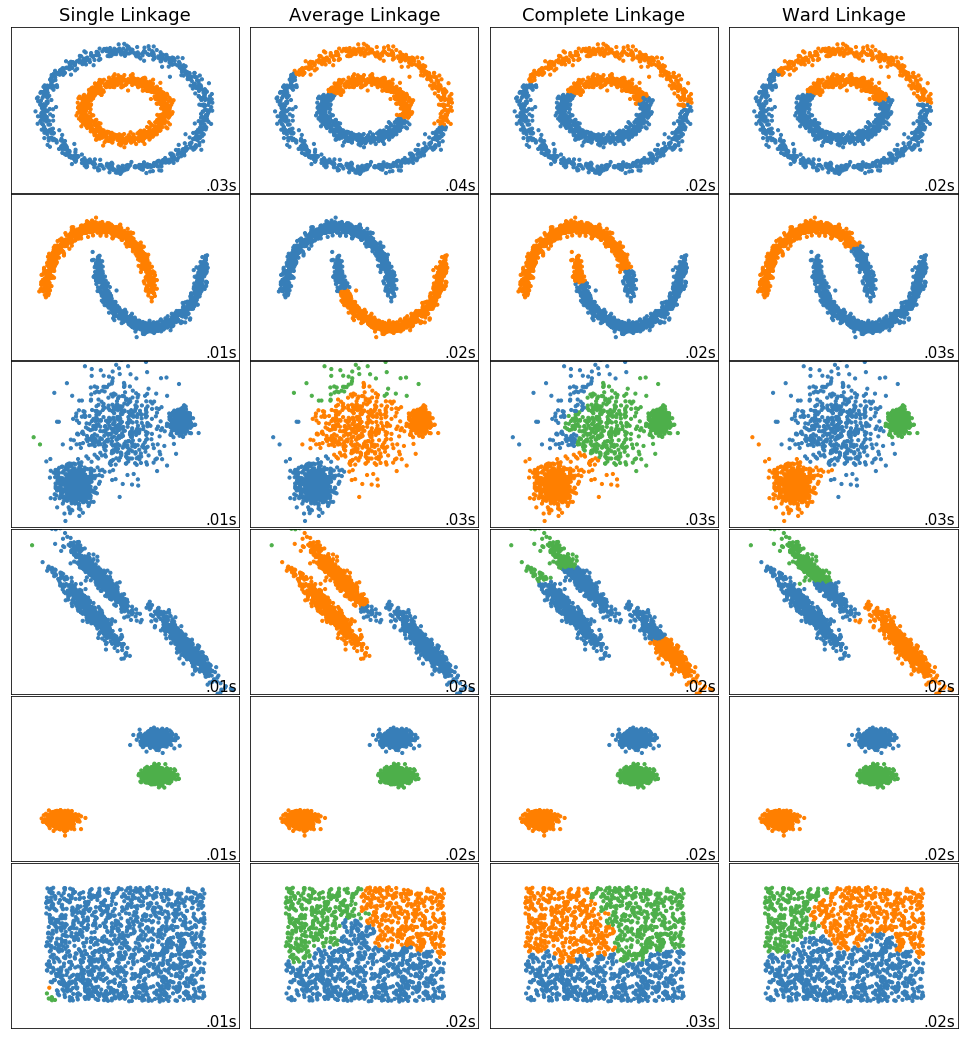

In [6]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

The main observations to make are:

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.

### Connectivity-Constrained Clustering
* Single, average, and complete linkage are unstable and tend to make a few clusters that grow quickly
* This means that only connected structures can be merged together

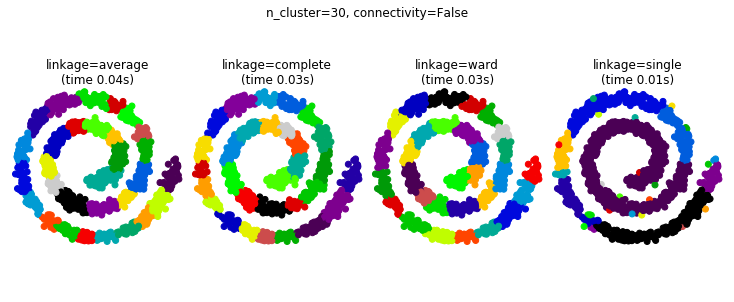

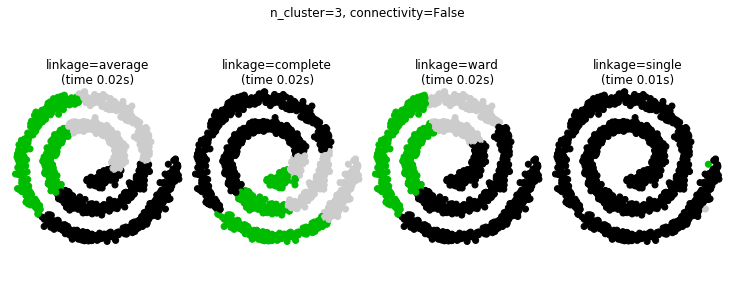

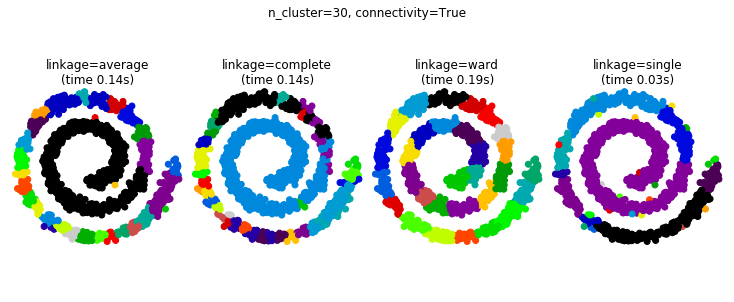

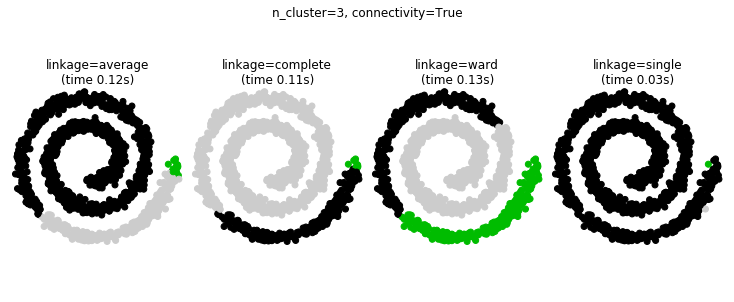

In [7]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'),y=.9)
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=12, y=1)


plt.show()

### Feature Agglomeration
* Sparsity can be used to reduce the curse of dimensionality (more features than there are samples)
* Can use clustering to merge together similar features 

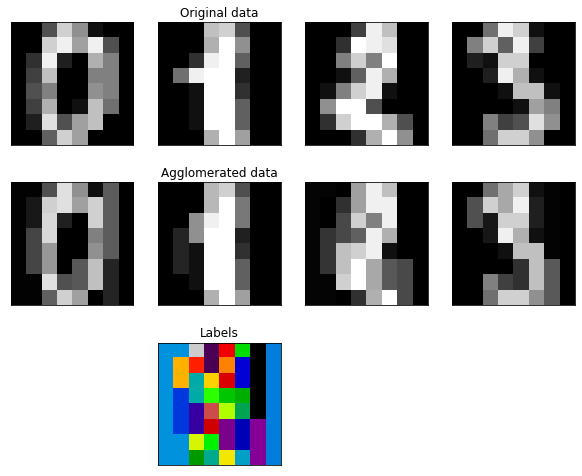

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)

agglo.fit(X)
X_reduced = agglo.transform(X)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)
plt.figure(1, figsize=(8, 7))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.nipy_spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()

# Decomposition Algorithms
* Reduce the number of dimensions in a dataset while still explaining as much of the information as possible

## Principal Component Analysis (PCA)

* One of the most broadly used unsupervised learning algorithms

* PCA belongs to a class of dimensionality reduction algorithm

* PCA can be used for: 
    - visualization of high dimensional data
    - noise filtering
    - feature extraction and engineering

## Introducing Principal Component Analysis
### Import functions

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

PCA is a very fast and flexible method to reduce dimensionality of data. 

This concept is easy to visualize in 2d

### Generating Some Data

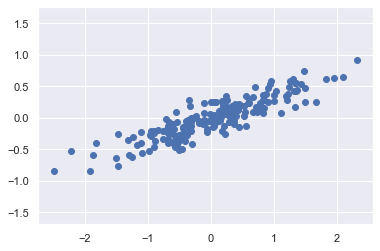

In [10]:
# sets the random state
rng = np.random.RandomState(1)

# makes 200 random points
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# plots the graph
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

This looks like a linear regression problem, however, if we did not know this linear trend, we can instead try and learn about the relationship between the *x* and *y* values

**In PCA you try and find the *principal axis* (the axis with the largest variance) of the dataset and use that axis to describe the data** 

### Implementing PCA in Scikit-learn

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### What PCA learns

**Components or Eigenvectors**

These represent the directions of largest variance

In [12]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


**Variance Explained**

This represents the amount of variance in the dataset explained by the principal component

In [13]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


### Visualizing what PCA is doing
1. Finds the direction of highest variance and draws a vector in that direction (eigenvector)
2. Projects all of the data points onto that dimension (eigenvalues)
3. Finds the next direction orthogonal to the first PC that has the largest variance. <br>


Process 2 and 3 repeat for the number of components selected

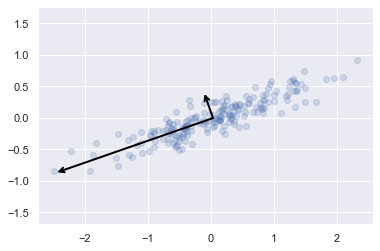

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

##### What does this graph show? 
* These vectors represent the principal axes in the data
* The length of the vector indicates how important that axis is in describing the distribution (the variance)


[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

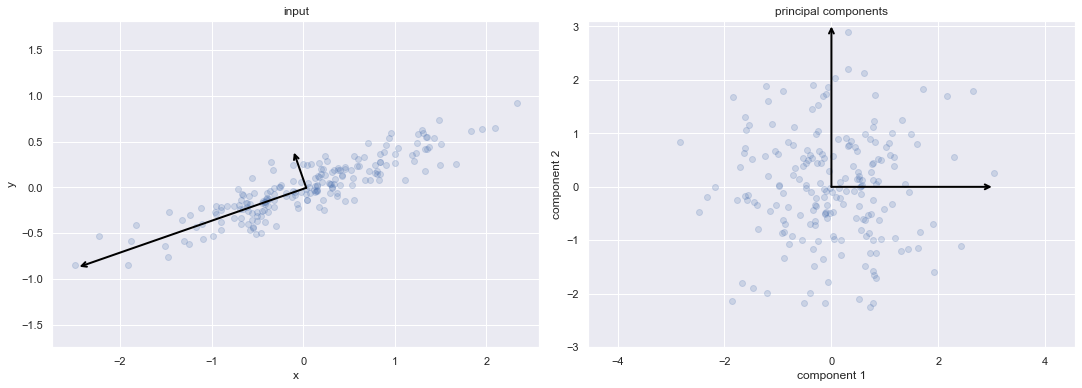

In [15]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

#### While this might just seem cute it has very far reaching implications. 
Generally when dealing with any dataset it is useful to test PCA first

# Use Cases for PCA

## Dimensionality Reduction

Example taking 2d data and converting it into 1d

In [16]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


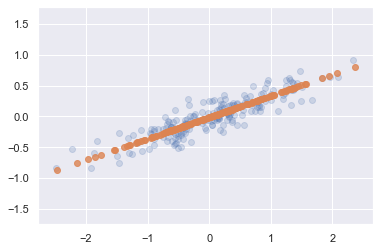

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Blue points represent the raw data, orange points represent the projected dimension

* When you conduct PCA some information is lost, however, most of the information is retained. 
* The question you have to ask is the representation "good enough" 

In this case, most of the information is retained while the dimensionality of the data was reduced in half

## Now a Real Example

### Import some packages

In [18]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [19]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


### Split into a training set and a test set using a stratified k fold

In [20]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#### Training a classifier without PCA

In [21]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 384.597s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### Evaluation of Model Quality

Predicting people's names on the test set
done in 0.569s
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.45       322
        macro avg       0.06      0.14      0.09       322
     weighted avg       0.21      0.45      0.28       322



/Users/joshuaagar/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


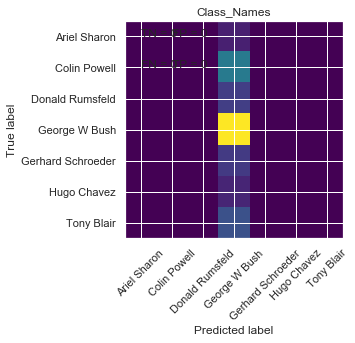

In [22]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))


cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


#### Compute PCA

In [23]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.113s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.012s


#### Train and SVM on the PCA data

In [24]:
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 25.830s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### Evaluation of Model Quality

Predicting people's names on the test set
done in 0.049s
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.86      0.67      0.75        27
    George W Bush       0.84      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.89      0.73      0.78       322
     weighted avg       0.86      0.85      0.85       322



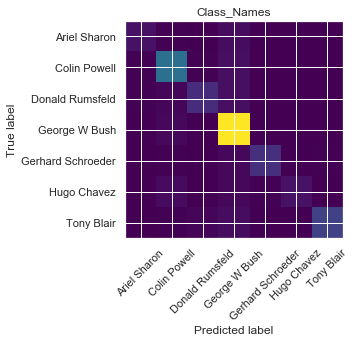

In [25]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))


cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
plt.title('Class_Names')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.show()


### PCA of Faces

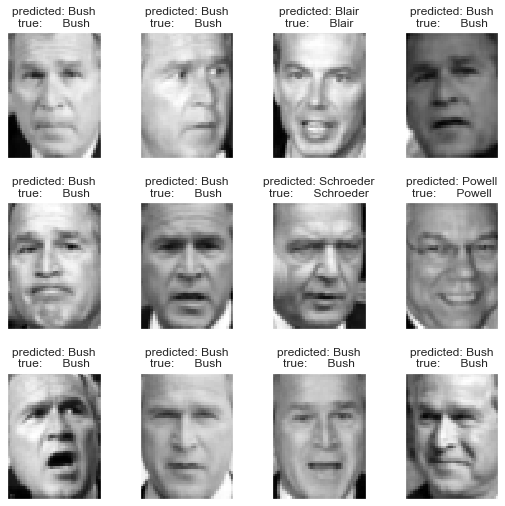

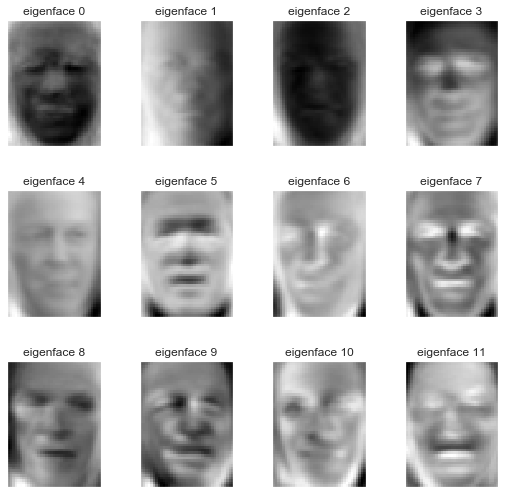

In [30]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [31]:
!pip install wget pysptools gdown

# Now an Example in Science

In [32]:
!pip install pycroscopy

In [33]:
# Import packages

# Ensure that this code works on both python 2 and python 3
from __future__ import division, print_function, absolute_import, unicode_literals

# basic numeric computation:
import numpy as np

# The package used for creating and manipulating HDF5 files:
import h5py

# Plotting and visualization:
import matplotlib.pyplot as plt

# for downloading files:
import wget
import os

# multivariate analysis:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, FastICA
import subprocess
import sys

def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
# finally import pycroscopy:
try:
    import pyUSID as usid
except ImportError:
    print('pyUSID not found.  Will install with pip.')
    import pip
    install('pyUSID')
    import pyUSID as usid
try:
    import pycroscopy as px
except ImportError:
    print('pycroscopy not found.  Will install with pip.')
    import pip
    install('pycroscopy')
    import pycroscopy as px
    
from pycroscopy.viz import cluster_utils

# Dataset

The data we will be working with is a STEM image of an oxide catalyst. <br>

The image is courtesy of A. Borisevich (ORNL) and Q. He (Manchester)

The image was processed using a sliding window method, to generate local 2D FFT spectra associated with individual locations within the image. We effectively have a stack of 2D images to analyze, which we can do so using multivariate analysis tools.

In [34]:
import gdown

url = 'https://drive.google.com/uc?id=1Y0PPFDSbrhErSp7YUr2sxTmDxXOMj2Ks'
output = 'SuperImage2.h5'
gdown.download(url, output, False)

Downloading...
From: https://drive.google.com/uc?id=1Y0PPFDSbrhErSp7YUr2sxTmDxXOMj2Ks
To: /Volumes/GoogleDrive/My Drive/Classes/MAT 497/Fall 2019/Fall_2019_Data_Analysis_and_Machine_Learning_for_Experimentalists/Linear Machine Learning Unsupervised/SuperImage2.h5
208MB [00:07, 27.1MB/s] 


'SuperImage2.h5'

In [35]:
data_file_path = 'SuperImage2.h5'
h5_file = h5py.File(data_file_path, mode='r+')
usid.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-FFT_Window_000
      -----------------------
      ├ FFT_Data
      ├ FFT_Data-Cluster_000
        --------------------
        ├ Cluster_Indices
        ├ Cluster_Values
        ├ Labels
        ├ Mean_Resp_Pos_Indices
        ├ Mean_Resp_Pos_Values
        ├ Mean_Response
      ├ FFT_Data-Cluster_001
        --------------------
        ├ Cluster_Indices
        ├ Cluster_Values
        ├ Labels
        ├ Mean_Resp_Pos_Indices
        ├ Mean_Resp_Pos_Values
        ├ Mean_Response
      ├ FFT_Data-Cluster_002
        --------------------
        ├ Cluster_Indices
        ├ Cluster_Values
        ├ Labels
        ├ Mean_Resp_Pos_Indices
        ├ Mean_Resp_Pos_Values
        ├ Mean_Response
      ├ FFT_Data-Cluster_003
        --------------------
        ├ Cluster_Indices
        ├ Cluster_Values
        ├ Labels
        ├ Mean_Resp_Pos_Indi

In [36]:
#Get the image
h5_meas_grp = h5_file['Measurement_000']

h5_image =  h5_meas_grp['Channel_000/Raw_Data']

#Convert to USID Dataset
h5_image = usid.USIDataset(h5_image)

# Getting a reference to the main spectral dataset:
h5_main = usid.USIDataset(h5_meas_grp['Channel_000/Raw_Data-FFT_Window_000/FFT_Data'])

print('Data currently of shape:', h5_main.shape)

[num_rows,num_cols] = h5_main.pos_dim_sizes
num_spect = h5_main.spec_dim_sizes[0]

Data currently of shape: (1024, 16384)


In [37]:
h5_main

<HDF5 dataset "FFT_Data": shape (1024, 16384), type "<f4">
located at: 
	/Measurement_000/Channel_000/Raw_Data-FFT_Window_000/FFT_Data 
Data contains: 
	FFT (a.u.) 
Data dimensions and original shape: 
Position Dimensions: 
	X - size: 32 
	Y - size: 32 
Spectroscopic Dimensions: 
	U_X - size: 128 
	U_Y - size: 128
Data Type:
	float32

(<Figure size 1080x1080 with 18 Axes>,
 <mpl_toolkits.axes_grid1.axes_grid.ImageGrid at 0x7f9b013b09e8>)

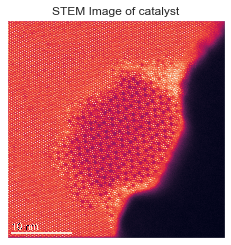

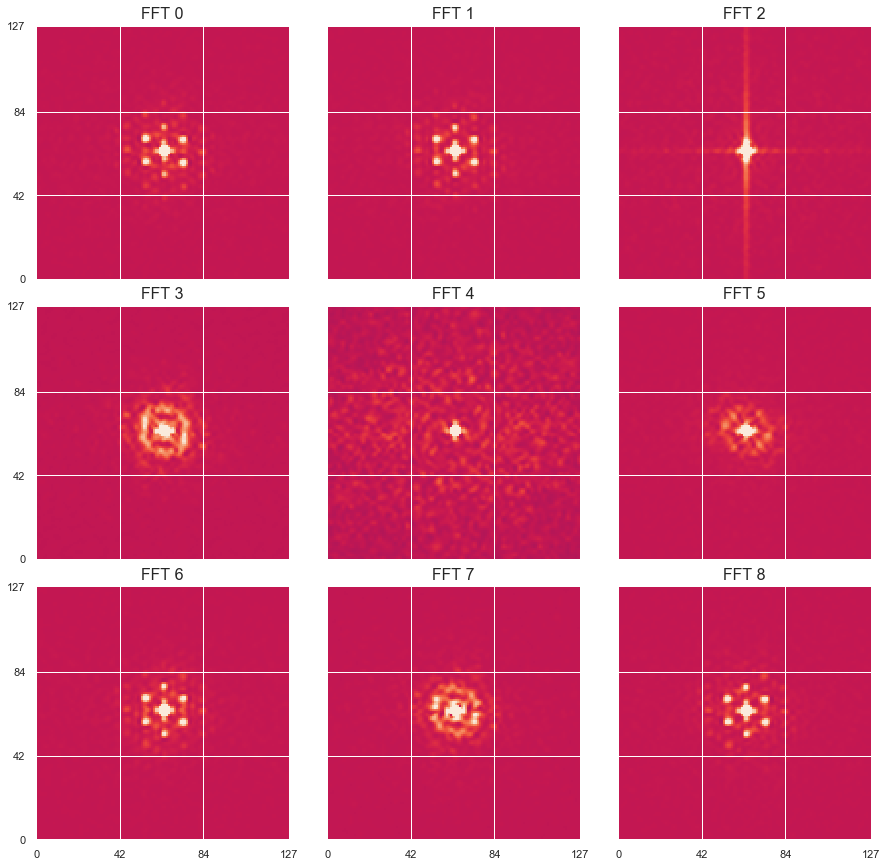

In [38]:
#Plot the image, and some spectra

fig, axes = plt.subplots()
axes.imshow(np.flipud(h5_image.get_n_dim_form()[:,:,0]));
axes.set_title('STEM Image of catalyst')
axes.set_xticks([]);
axes.set_yticks([]);

FFT_mat = h5_main.get_n_dim_form().reshape(h5_main.pos_dim_sizes[0]*h5_main.pos_dim_sizes[1], h5_main.spec_dim_sizes[0], h5_main.spec_dim_sizes[1])

random_indices = np.random.randint(low = 0, high = FFT_mat.shape[0], size = 9)

#Now plot some FFT windows
usid.plot_utils.use_nice_plot_params();

usid.plot_utils.plot_map_stack(FFT_mat[random_indices,:,:], subtitle= "FFT", title = '')

## Singular Value Decomposition (SVD)

SVD is an eigenvector decomposition that is defined statistically, and therefore typically produces
non-physical eigenvectors. Consequently, the interpretation of eigenvectors and abundance maps from
SVD requires care and caution in interpretation. Nonetheless, it is a good method for quickly
visualizing the major trends in the dataset since the resultant eigenvectors are sorted in descending
order of variance or importance. Furthermore, SVD is also very well suited for data cleaning through
the reconstruction of the dataset using only the first N (most significant) components.

SVD results in three matrices:

* V - Eigenvectors sorted by variance in descending order
* U - corresponding abundance maps
* S - Variance or importance of each of these components

Here we will use Single Value Decomposition
* SVD is like PCA with the exception that you don't need to find the whole covarance matrix
* SVD results in two unaitary matrices ($U,V^*$) and a rectangular diagonal matrix of single values ($\Sigma$)
* These are very similar just calculated in different ways
* SVD is much more efficent and can be used to compute the PC

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes back to the HDF5 file
Note: SVD has already been performed with the same parameters before. These results will be returned by compute() by default. Set override to True to force fresh computation
[<HDF5 group "/Measurement_000/Channel_000/Raw_Data-FFT_Window_000/FFT_Data-SVD_000" (7 members)>]
Returning previously computed results from: /Measurement_000/Channel_000/Raw_Data-FFT_Window_000/FFT_Data-SVD_000
set the "override" flag to True to recompute results


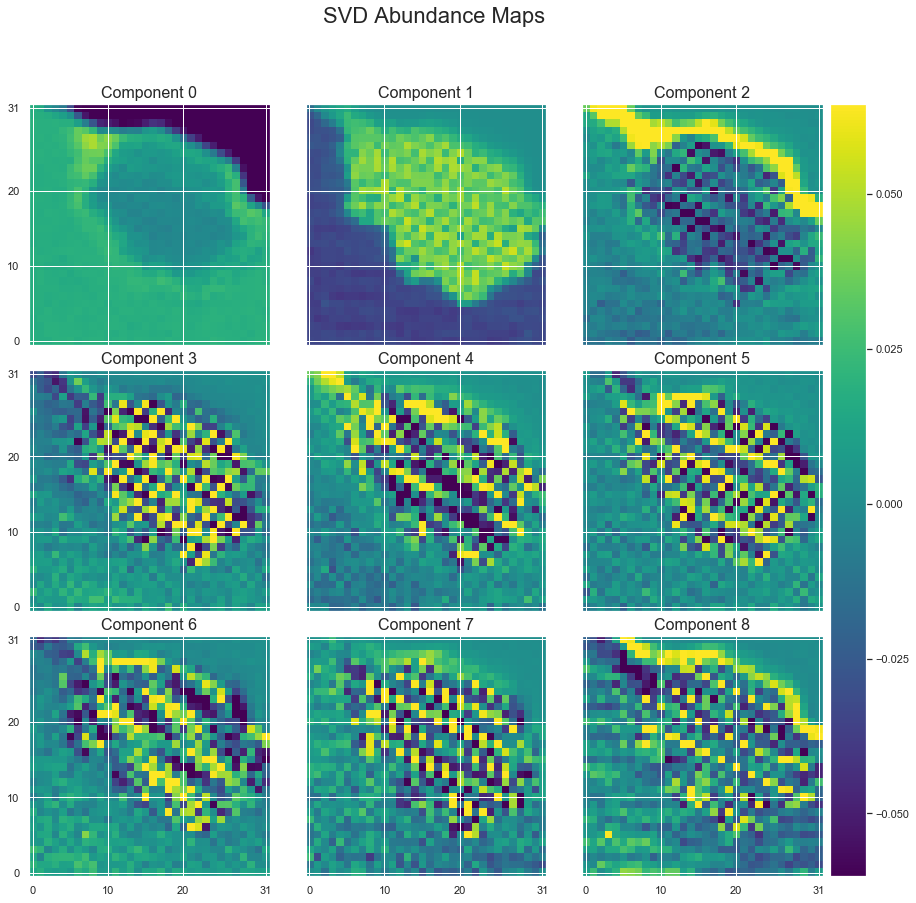

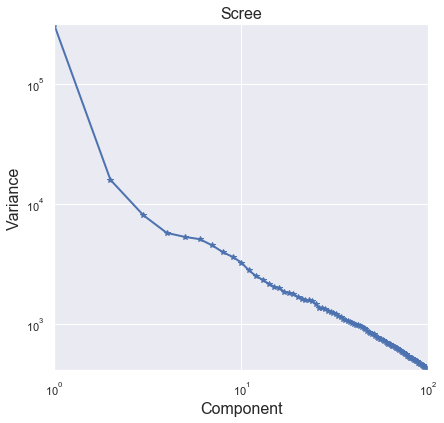

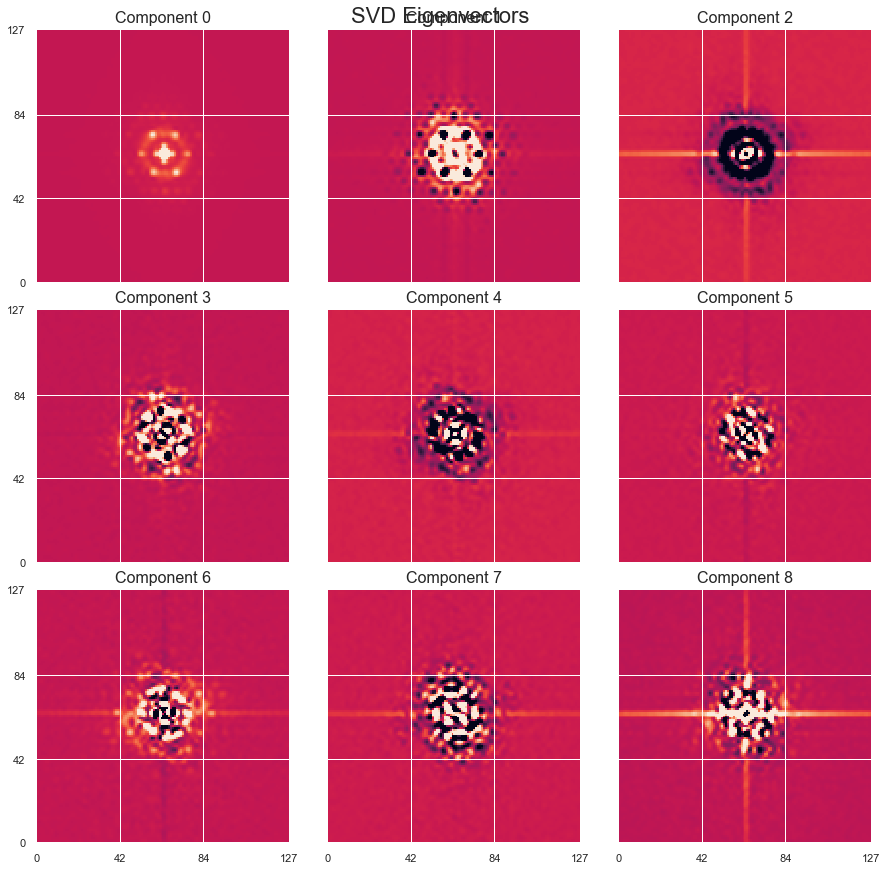

In [39]:
decomposer = px.processing.svd_utils.SVD(h5_main, num_components=100)
h5_svd_group = decomposer.compute()

h5_u = h5_svd_group['U']
h5_v = h5_svd_group['V']
h5_s = h5_svd_group['S']

# Since the two spatial dimensions (x, y) have been collapsed to one, we need to reshape the abundance maps:
abun_maps = np.reshape(h5_u[:, :25], (num_rows, num_cols, -1))

usid.plot_utils.plot_map_stack(abun_maps, num_comps=9, title='SVD Abundance Maps', reverse_dims=True,
                             color_bar_mode='single', cmap='viridis', title_yoffset=0.95)


# Visualize the variance / statistical importance of each component:
usid.plot_utils.plot_scree(h5_s, title='Scree')

# Visualize the eigenvectors:
_ = usid.plot_utils.plot_map_stack(h5_v[:9, :].reshape(9,h5_main.spec_dim_sizes[0],h5_main.spec_dim_sizes[1]), 
                                       title='SVD Eigenvectors', evenly_spaced=False)

# Independent Component Analysis

* Tries to split signals into their fundamental components

You can think of this as **the cocktail party problem**. Imagine you are in a room with a bunch of people talking. How can you hear one persons excluding the noise

## A visual Comparison between PCA and ICA

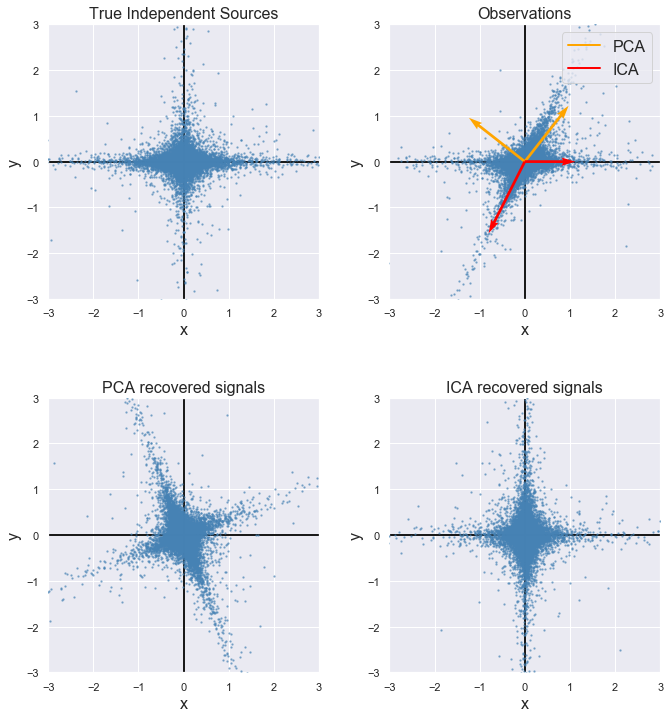

In [40]:

# Authors: Alexandre Gramfort, Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA

# #############################################################################
# Generate sample data
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)


# #############################################################################
# Plot results

def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

ICA looks for directions in the data space that are highly non-Gaussian

## How this works?

Imagine you are at a party and there are two people talking. You can hear both of them but one is closer to you.

Let's think of each source as a sine wave. The one closer to you will be more dominate. 
<h3 align="center">$x=As$</h3>
Where:<br>
x - is the observed signal
<br>
A - is the mixing matrix
<br>
s - is the source

### Retrieving the components

The above equations implies that if we invert *A* and multiply it with the observed signals _x_ we will retrieve our sources:

<h3 align="center">$W=A^{-1}$</h3>

<h3 align="center">$s=xW$</h3>

This means that what our **ICA algorithm needs to estimate is *W***. 

In [41]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter NotebookLet the
%matplotlib inline

### Create toy signals

We will start by creating some independent signals that will be mixed by matrix A. The independent sources signals are **(1)** a sine wave, **(2)** a saw tooth signal and **(3)** a random noise vector. After calculating their dot product with _A_ we get three linear combinations of these source signals.

In [42]:
# Set a seed for the random number generator for reproducibility
np.random.seed(23)

# Number of samples
ns = np.linspace(0, 200, 1000)

# Source matrix
S = np.array([np.sin(ns * 1), 
              signal.sawtooth(ns * 1.9),
              np.random.random(len(ns))]).T

# Mixing matrix
A = np.array([[0.5, 1, 0.2], 
              [1, 0.5, 0.4], 
              [0.5, 0.8, 1]])

# Mixed signal matrix
X = S.dot(A).T

### Plots the signals

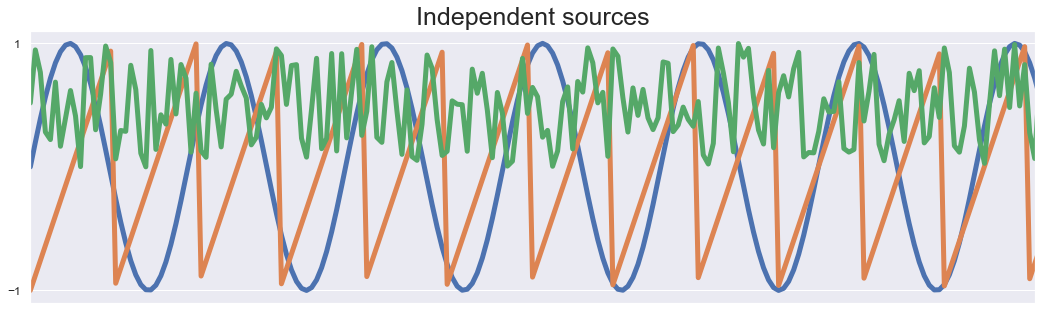

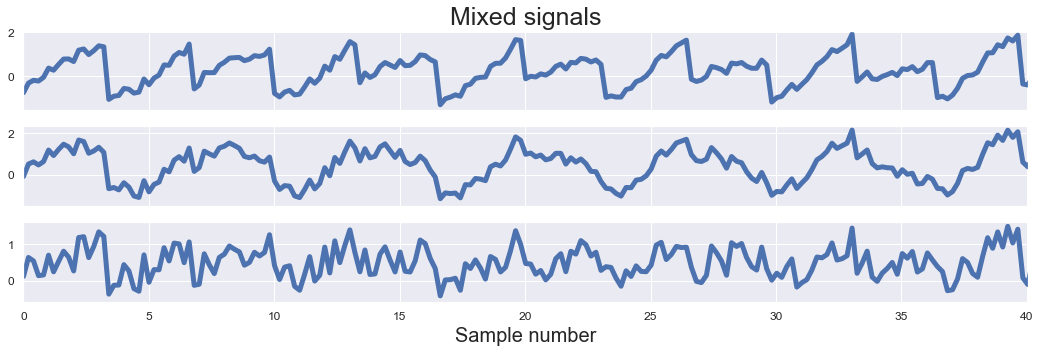

In [43]:
# Plot sources & signals
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(ns, S, lw=5)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_xlim(ns[0], ns[200])
ax.tick_params(labelsize=12)
ax.set_title('Independent sources', fontsize=25)

fig, ax = plt.subplots(3, 1, figsize=[18, 5], sharex=True)
ax[0].plot(ns, X[0], lw=5)
ax[0].set_title('Mixed signals', fontsize=25)
ax[0].tick_params(labelsize=12)

ax[1].plot(ns, X[1], lw=5)
ax[1].tick_params(labelsize=12)
ax[1].set_xlim(ns[0], ns[-1])

ax[2].plot(ns, X[2], lw=5)
ax[2].tick_params(labelsize=12)
ax[2].set_xlim(ns[0], ns[-1])
ax[2].set_xlabel('Sample number', fontsize=20)
ax[2].set_xlim(ns[0], ns[200])

plt.show()

### Preconditions

1. Signals x need to be a **linear** combination of **independent** components. 

2. The Signals must not be correlated
    * This implies that the covariance between the signals is 0.

* Signals need to be **non-Gaussiananity** of the independent source signals. 
    * The joint density distribution of two independent non-Gaussian signals will be uniform on a square. Mixing these two signals with an orthogonal matrix will result in two signals that are now not independent anymore and have a uniform distribution on a parallelogram. Which means that if we are at the minimum or maximum value of one of our mixed signals we know the value of the other signal. Therefore they are not independent anymore. 
    * For a Gaussian distribution the joint distribution is symmetric.


### The code below illustrates these differences between Gaussian and non-Gaussian signals.

In [44]:
# Define two non-gaussian uniform components
s1 = np.random.rand(1000)
s2 = np.random.rand(1000)
s = np.array(([s1, s2]))

# Define two gaussian components
s1n = np.random.normal(size=1000)
s2n = np.random.normal(size=1000)
sn = np.array(([s1n, s2n]))

# Define orthogonal mixing matrix
A = np.array(([0.96, -0.28],[0.28, 0.96]))

# Mix signals
mixedSignals = s.T.dot(A)
mixedSignalsN = sn.T.dot(A)

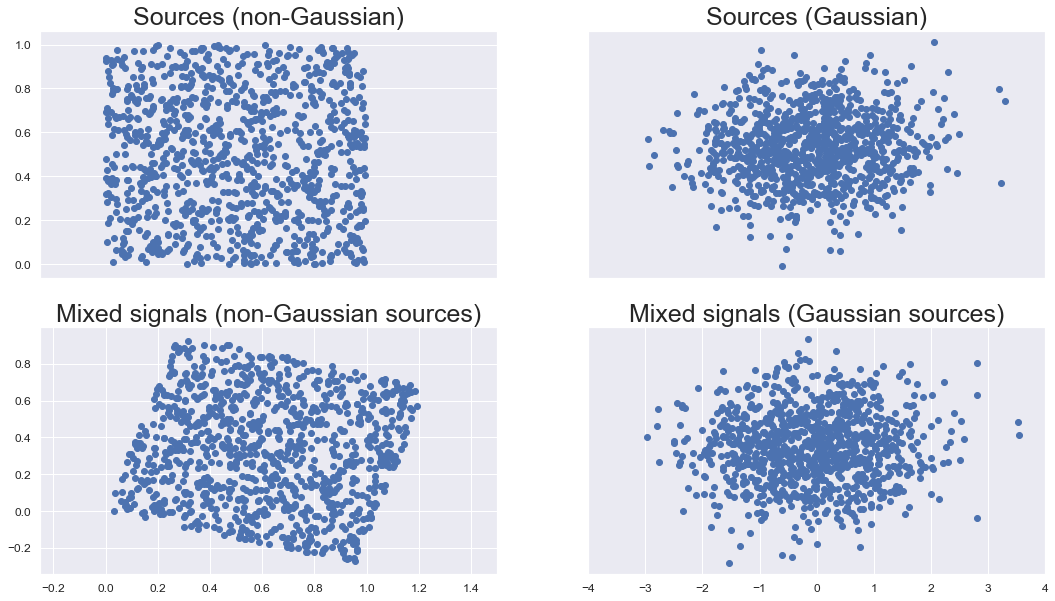

In [45]:
# Plot results
fig, ax = plt.subplots(2, 2, figsize=[18, 10])
ax[0][0].scatter(s[0], s[1])
ax[0][0].tick_params(labelsize=12)
ax[0][0].set_title('Sources (non-Gaussian)', fontsize=25)
ax[0][0].set_xlim([-0.25, 1.5])
ax[0][0].set_xticks([])

ax[0][1].scatter(sn[0], sn[1])
ax[0][1].tick_params(labelsize=12)
ax[0][1].set_title('Sources (Gaussian)', fontsize=25)
ax[0][1].set_xlim([-4, 4])
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

ax[1][0].scatter(mixedSignals.T[0], mixedSignals.T[1])
ax[1][0].tick_params(labelsize=12)
ax[1][0].set_title('Mixed signals (non-Gaussian sources)', fontsize=25)
ax[1][0].set_xlim([-0.25, 1.5])

ax[1][1].scatter(mixedSignalsN.T[0], mixedSignalsN.T[1])
ax[1][1].tick_params(labelsize=12)
ax[1][1].set_title('Mixed signals (Gaussian sources)', fontsize=25)
ax[1][1].set_xlim([-4, 4])
ax[1][1].set_yticks([])

plt.show()

### Visualize properties of toy signals

To check if the properties discussed above also apply for our toy signals we will plot them accordingly.
As expected the source signals are distributed on a square for non-Gaussian random variables. Likewise the mixed signals form a paramllelogram in the right plot of Figure 3 which shows that the mixed signals are not independent anymore.

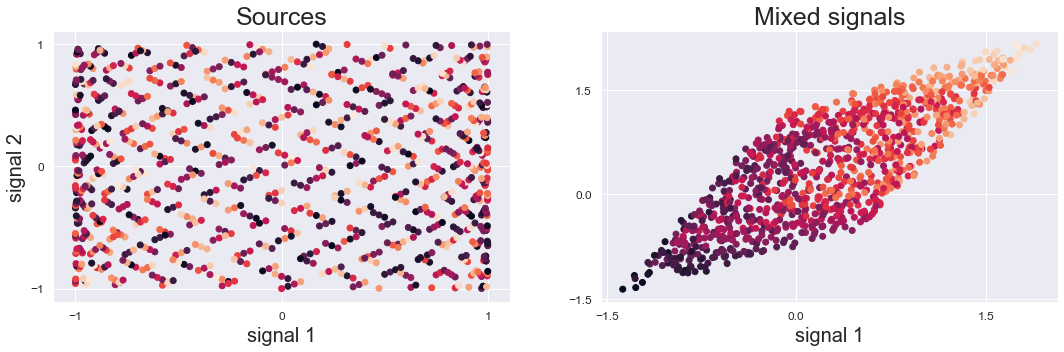

In [46]:
fig, ax = plt.subplots(1, 2, figsize=[18, 5])
ax[0].scatter(S.T[0], S.T[1], c=S.T[2])
ax[0].tick_params(labelsize=12)
ax[0].set_yticks([-1, 0, 1])
ax[0].set_xticks([-1, 0, 1])
ax[0].set_xlabel('signal 1', fontsize=20)
ax[0].set_ylabel('signal 2', fontsize=20)
ax[0].set_title('Sources', fontsize=25)

ax[1].scatter(X[0], X[1], c=X[2])
ax[1].tick_params(labelsize=12)
ax[1].set_yticks([-1.5, 0, 1.5])
ax[1].set_xticks([-1.5, 0, 1.5])
ax[1].set_xlabel('signal 1', fontsize=20)
ax[1].set_title('Mixed signals', fontsize=25)
plt.show()

## Preprocessing functions

To get an optimal estimate of the independent components it is advisable to do some pre-processing of the data. In the following the two most important pre-processing techniques are explained in more detail.

### Centering

* This is a simple subtraction of the mean from our input X. As a result the centered mixed signals will have zero mean which implies that also our source signals s are of zero mean. 
* This simplifies the ICA calculation and the mean can later be added back.

In [47]:
def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean 
    return centered, mean

### Whitening
* The goal here is to linearly transform the observed signals X in a way that potential correlations between the signals are removed and their variances equal unity. 
* As a result the covariance matrix of the whitened signals will be equal to the identity matrix

In [48]:
def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    n = np.shape(x)[1] - 1
    m = x - mean

    return (m.dot(m.T))/n

In [49]:
def whiten(x):
    # Calculate the covariance matrix
    coVarM = covariance(X) 
    
    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)
    
    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S)) 
    
    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))
    
    # Project onto whitening matrix
    Xw = np.dot(whiteM, X) 
    
    return Xw, whiteM

## Implement the fast ICA algorithm

Now it is time to look at the actual ICA algorithm. As discussed above one precondition for the ICA algorithm to work is that the source signals are non-Gaussian. Therefore the result of the ICA should return sources that are as non-Gaussian as possible. To achieve this we need a measure of Gaussianity. One way is Kurtosis and it could be used here but another way has proven more efficient. Nevertheless we will have a look at kurtosis at the end of this notebook. 
For the actual algorithm however we will use the equations $g$ and $g'$ which are derivatives of $f(u)$ as defined below.

<h3 align="center">$f(u)=\log \cosh(u)$</h3> 

<h3 align="center">$g(u)=\tanh(u)$</h3> 

<h3 align="center">$g'(u)=1-\tanh^{2}(u)$</h3> 

These equations allow an approximation of negentropy and will be used in the below ICA algorithm which is [based on a fixed-point iteration scheme](https://homepage.math.uiowa.edu/~whan/072.d/S3-4.pdf):

<h3>$for\ 1\ to\ number\ of\ components\ c:$</h3>

<h3>$\ \ \ \ \ \ \ \ w_{p} \equiv random\ initialisation$</h3>

<h3>$\ \ \ \ \ \ \ \ while\ w_{p}\ not\ < threshold:$</h3>

<h3>$\ \ \ \ \ \ \ \ \ \ \ \ \ w_{p} \equiv \frac{1}{n}(Xg(W^{T}X) - g'(W^{T}X)W)$</h3>

<h3>$\ \ \ \ \ \ \ \ \ \ \ \ \ w_{p} \equiv w_{p}-\sum_{j=1}^{p-1}(w_{p}^{T}w_{j})w_{j}$</h3>

<h3>$\ \ \ \ \ \ \ \ \ \ \ \ \ w_{p} \equiv w_{p}/||w_{p}||$</h3>

<h3>$\ \ \ \ \ \ \ \ W \equiv [w_{1},...,w_{c}]$</h3>


So according to the above what we have to do is to take a random guess for the weights of each component. The dot product of the random weights and the mixed signals is passed into the two functions g and g'. We then subtract the result of g' from g and calculate the mean. The result is our new weights vector. Next we could directly divide the new weights vector by its norm and repeat the above until the weights do not change anymore. There would be nothing wrong with that. However the problem we are facing here is that in the iteration for the second component we might identify the same component as in the first iteration. To solve this problem we have to decorrelate the new weights from the previously identified weights. This is what is happening in the step between updating the weights and dividing by their norm.

### We will skip this but it is here

In [50]:
def fastIca(signals,  alpha = 1, thresh=1e-8, iterations=5000):
    m, n = signals.shape

    # Initialize random weights
    W = np.random.rand(m, m)

    for c in range(m):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())

            i = 0
            lim = 100
            while ((lim > thresh) & (i < iterations)):

                # Dot product of weight and signal
                ws = np.dot(w.T, signals)

                # Pass w*s into contrast function g
                wg = np.tanh(ws * alpha).T

                # Pass w*s into g prime 
                wg_ = (1 - np.square(np.tanh(ws))) * alpha

                # Update weights
                wNew = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()

                # Decorrelate weights              
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt((wNew ** 2).sum())

                # Calculate limit condition
                lim = np.abs(np.abs((wNew * w).sum()) - 1)
                
                # Update weights
                w = wNew
                
                # Update counter
                i += 1

            W[c, :] = w.T
    return W

### Preprocessing

In [51]:
# Center signals
Xc, meanX = center(X)

# Whiten mixed signals
Xw, whiteM = whiten(Xc)

## Check for Whitening

In [52]:
# Check if covariance of whitened matrix equals identity matrix
print(np.round(covariance(Xw)))

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


## Running ICA

In [53]:
W = fastIca(Xw,  alpha=1)

#Un-mix signals using 
unMixed = Xw.T.dot(W.T)

# Subtract mean
unMixed = (unMixed.T - meanX).T

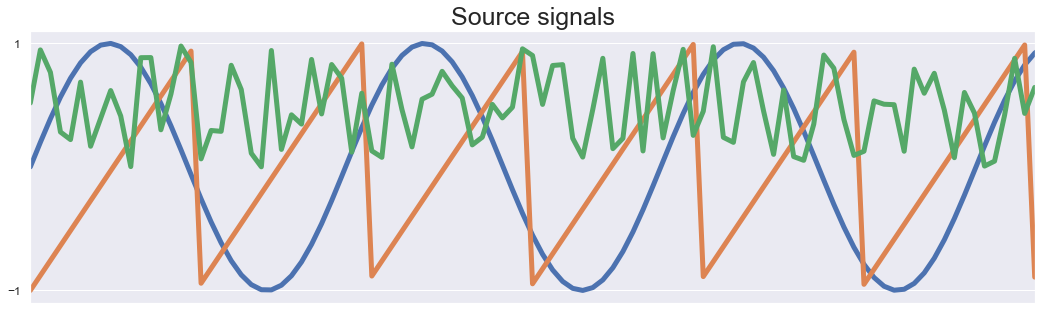

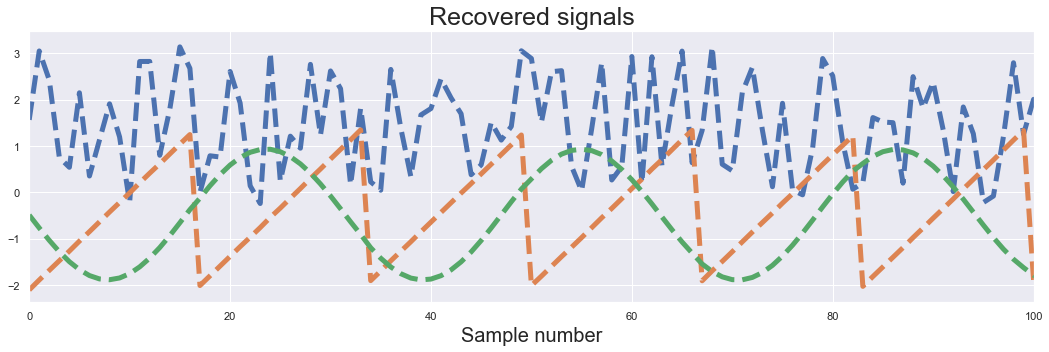

In [54]:
# Plot input signals (not mixed)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Source signals', fontsize=25)
ax.set_xlim(0, 100)

fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(unMixed, '--', label='Recovered signals', lw=5)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)

plt.show()

# That was hard ...
## This is how we do ICA

In [55]:
np.rollaxis(X,1).shape

(1000, 3)

In [56]:
ica = decomposition.FastICA(n_components=3,tol=1e-8, max_iter=5000)
S_ = ica.fit_transform(np.rollaxis(X,1))  # Get the estimated sources
A_ = ica.mixing_.T

NameError: name 'decomposition' is not defined

In [ ]:
# Plot input signals (not mixed)
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S, lw=5)
ax.tick_params(labelsize=12)
ax.set_xticks([])
ax.set_yticks([-1, 1])
ax.set_title('Source signals', fontsize=25)
ax.set_xlim(0, 100)

fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(S_, '--', label='Recovered signals', lw=5)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)

plt.show()

# Non-Negative Matrix Factorization

* matrix factorization method where we constrain the matrices to be nonnegative

## What is matrix factorization?

If we want to factor $X$ into two matrices $W$ and $H$ there is no guarantee that we can recover the original matrix
$$X \approx WH$$

suppose that $X$ is composed of m rows $x_1, x_2, ... x_m$ ,  $W$  is composed of $k$ rows $w_1, w_2, ... w_k$ ,  $H$
is composed of $m$ rows $h_1, h_2, ... h_m$ . 
* Each row in $X$  can be considered a data point. 
* For instance, in the case of decomposing images, each row in $X$ is a single image, and each column represents some feature.

![figure](images/mf_concept.png)

* $x$ is the sum of weights multiplied by components

* We add conditions to the weights. In the case of NMF it is that the weights are non-negative.

## When do we use NMF

* Good when underlying factors can be interpreted as non-negative

### Examples
#### Comparison to PCA

* PCA is another common matrix factorization technique
* Factors can have positive and negative values ... Why do you think this might be bad?

![figure](images/pca_faces.png)

* Components do not make that much sense
* Hard to interpret what positive and negative components mean

### NMF all the values are positive
* The components have interpretable meanings

![figure](images/nmf_faces.png)

* Different components look like different features of a face.

### Another example

Imagine that you have a bunch of text documents that you want to sort by topical area.

1. You made a bag of the most common words that appear in the set.

2. If you were to conduct NMF words like "food" and "tasty" might be grouped into a "food" component vector which has some positive value

3. This food component has a positive value and thus can be interpreted. PCA could create a feature that has negative food value ... This has no meaning

### Interesting property of NMF

Because examples generally do not belong to multiple groups, NMF tends to naturally produce sparse outputs where different groups are separated

## How does NMF magic work?

* In order to conduct NMF we formalize an objective function and iteratively optimize it. 
* NMF is a difficult problem to optimize so we aim for a local minimum

$$minimize \, \| X - WH \|_{F}^{2} \,  w.r.t.  \, W, H \, s.t. \, W, H \geq 0$$

*N.B.* : $w.r.t.$ with respect to. $s. t.$ such that

$\| X - WH \|_{F}^{2} \$ is called the frobenius norm (the sum of element-wise squared errors)

#### Optimization of NMF
There are a variety of optimization methods that can be used for this purpose:
1. Multiplicative Update
2. Hierarchical Alternating Least Squares
3. etc.

These are beyond the scope of this course

## Other tricks
Just like in deep learning there are a bunch of tricks that can be used

#### Initialization
1. Since the problem does not have an analytical solution initialization makes a difference
    * Generally random initialization can work well
    * Can be improved with using a modified SVD that has only positive values

#### Regularization
Too prevent the weights from becoming too large one can add regularization $l_2$ or sparsity $l_1$

## NMF Example
### Topic search

##### Imports packages

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

##### Loads the dataset

In [ ]:
data= fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data

In [ ]:
print(data[0])
len(data)

#### convert the text to a tf-idf weighted term-document matrix

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, min_df=10, stop_words='english')
X = vectorizer.fit_transform(data)
idx_to_word = np.array(vectorizer.get_feature_names())

In [ ]:
idx_to_word

##### apply NMF

In [ ]:
nmf = NMF(n_components=20, solver="mu")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
 
for i, topic in enumerate(H):
 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-10:]]])))

## NMF on MNIST

### Import Functions

In [ ]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF
from sklearn.neighbors import KNeighborsClassifier


### Set Parameters

In [ ]:
train_samples = 1000
nmf_components = 49
np.random.seed(0)

### Import Data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

inputs_train = X_train[0:train_samples].astype('float32') / 255.
inputs_train = inputs_train.reshape((len(inputs_train), np.prod(inputs_train.shape[1:])))

'''
inputs_test = X_test[0:train_samples].astype('float32') / 255.
inputs_test = inputs_test.reshape((len(inputs_test), np.prod(inputs_test.shape[1:])))
'''

### Plots Raw Images

In [ ]:
fig=plt.figure(figsize=(8, 8))
rows = min(int(np.sqrt(train_samples)),10)
columns = min(int(train_samples / rows),10)
for i in range(0, columns*rows):
    img = inputs_train[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### NMF

In [ ]:

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
nmf = NMF(n_components=nmf_components, random_state=0, solver='mu', init='random', max_iter=200, tol=1e-4)

W = nmf.fit_transform(inputs_train)
H = nmf.components_

# H = n_components x pixels (list of components)

fig=plt.figure(figsize=(8, 8))
rows = min(int(np.sqrt(nmf_components)),10)
columns = min(int(nmf_components / rows),10)
for i in range(0, columns*rows):
    img = H[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# W = samples x n_components (component mapping for each sample)

fig=plt.figure(figsize=(8, 8))
rows = min(int(np.sqrt(train_samples)),10)
columns = min(int(train_samples / rows),10)
for i in range(0, columns*rows):
    img = W[i].reshape((int(np.sqrt(nmf_components)), int(np.sqrt(nmf_components))))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### Reconstruction

In [ ]:
output = nmf.inverse_transform(W)

fig=plt.figure(figsize=(8, 8))
rows = min(int(np.sqrt(train_samples)),10)
columns = min(int(train_samples / rows),10)
for i in range(0, columns*rows):
    img = inputs_train[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

fig=plt.figure(figsize=(8, 8))
rows = min(int(np.sqrt(train_samples)),10)
columns = min(int(train_samples / rows),10)
for i in range(0, columns*rows):
    img = output[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# Manifold Learning

principal component analysis (PCA) can be used in the dimensionality reduction task—reducing the number of features of a dataset while maintaining the essential relationships between the points. 
* While PCA is flexible, fast, and somewhat interpretable, it does not perform so well when there are nonlinear relationships

**manifold learning**—a class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces.

![](images/rolled_sheet_paper.jpg)

* A sheet of paper lives in a 3d world but lies on a 2d manifold
* Manifold unfolding tries to learn this
* no matter how you bend, rotate, curl or crumple the paper it still lives on a 2d manifold

**Manifold learning algorithms would seek to learn about the fundamental two-dimensional nature of the paper, even as it is contorted to fill the three-dimensional space.**

## Import functions

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Manifold Learning: "HELLO"

To make these concepts more clear, let's start by generating some two-dimensional data that we can use to define a manifold.
Here is a function that will create data in the shape of the word "HELLO":

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
fig=plt.figure(figsize=(12, 12))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

## Multidimensional Scaling (MDS)

* The  choice of *x* and *y* values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent.
* If we use a rotation matrix to rotate the data, the *x* and *y* values change, but the data is still fundamentally the same:

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
fig=plt.figure(figsize=(12, 12))
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

* *x* and *y* values are not necessarily fundamental to the relationships in the data.
* What *is* fundamental, in this case, is the *distance* between each point and the other points in the dataset.
* A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$.

Let's use Scikit-Learn's efficient ``pairwise_distances`` function to do this for our original data:

### Pairwise Distance Calculation

In [57]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(3, 3)

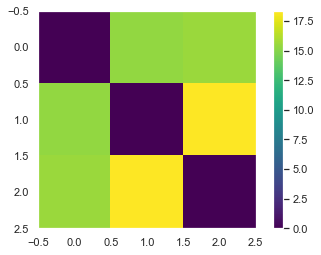

In [58]:
plt.imshow(D, zorder=2, cmap='viridis', interpolation='nearest')
plt.colorbar();

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same:

In [59]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

NameError: name 'X2' is not defined

* This means that the pairwise distance in invariant to rotations

* This representation no longer looks like Hello

* Transforming a distance matrix back to real space is difficult

### Multidimensional scaling

In [60]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
fig=plt.figure(figsize=(12, 12))
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

NameError: name 'colorize' is not defined

<Figure size 864x864 with 0 Axes>

The MDS algorithm recovers one of the possible two-dimensional coordinate representations of our data, using *only* the $N\times N$ distance matrix describing the relationship between the data points.

## MDS as Manifold Learning

* The usefulness of this becomes more apparent when we consider the fact that distance matrices can be computed from data in *any* dimension.

So, for example, instead of simply rotating the data in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

In [61]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

AssertionError: 

NameError: name 'X3' is not defined

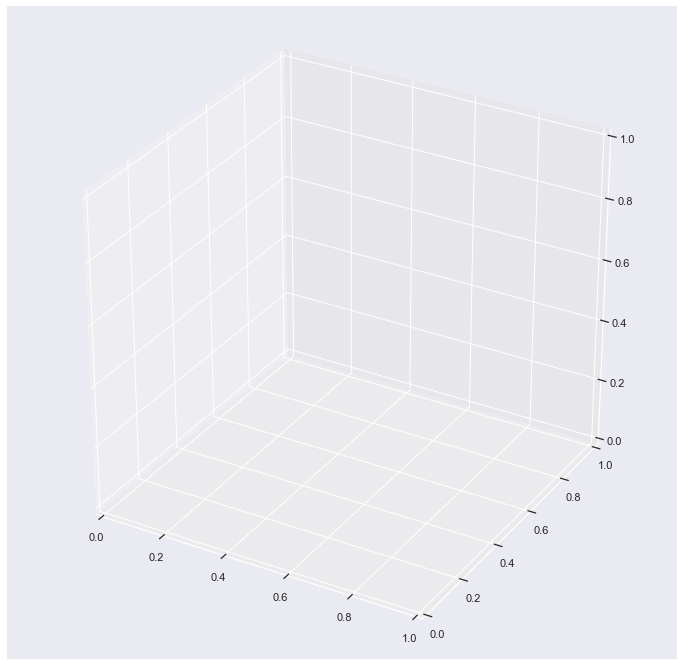

In [62]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12, 12))

ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

In [ ]:
model = MDS(n_components=2, random_state=1)
fig=plt.figure(figsize=(12, 12))
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

**Multidimensional Scaling still recovers the image!!!**

This is essentially the goal of a manifold learning estimator: given 
high-dimensional embedded data, it seeks a low-dimensional representation of the data that preserves certain relationships within the data.
In the case of MDS, the quantity preserved is the distance between every pair of points.

## Nonlinear Embeddings: Where MDS Fails

* The word "Hello" has linear relationships between datapoints
* *linear* embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces.

* Where MDS breaks down is when the embedding is nonlinear—that is, when it goes beyond this simple set of operations.

Consider the following embedding, which takes the input and contorts it into an "S" shape in three dimensions:

In [63]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

Again this is 3d data but the manifold is much more complicated

NameError: name 'colorize' is not defined

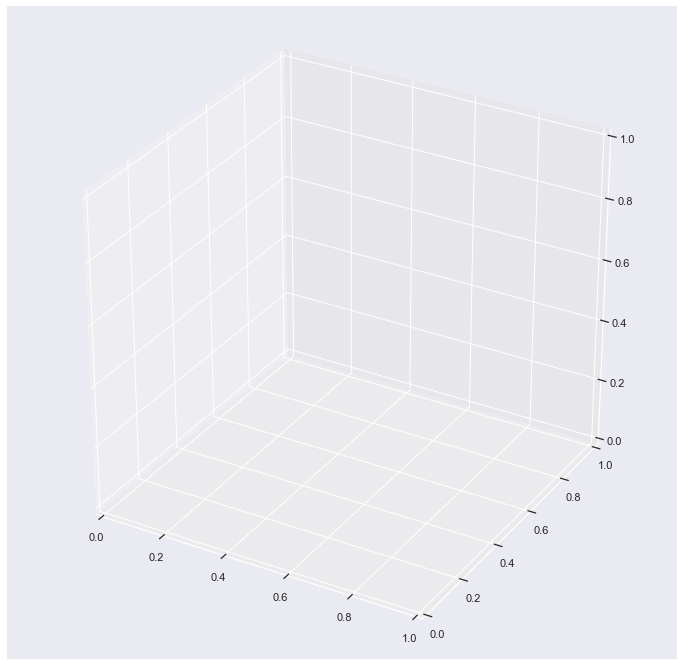

In [64]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12, 12))

ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

The relationships between the data points are still the same but it has been wrapped into a shape of an S

If we try MDS we are not able to unwrap this nonlinear embedding

In [65]:
from sklearn.manifold import MDS
fig=plt.figure(figsize=(12, 12))

model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

/Users/joshuaagar/anaconda3/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


NameError: name 'colorize' is not defined

<Figure size 864x864 with 0 Axes>

The best two-dimensional *linear* embeding does not unwrap the S-curve, but instead throws out the original y-axis.

## Nonlinear Manifolds: Locally Linear Embedding

How can we move forward here? 
* we can see that the source of the problem is that MDS tries to preserve distances between faraway points when constructing the embedding.

* If we instead modified the algorithm such that it only preserves distances between nearby points?

In [66]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.neighbors import NearestNeighbors

# construct lines for MDS
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
lines_MDS = [(XS[i], XS[j]) for i in ind[:100] for j in ind[100:200]]

# construct lines for LLE
nbrs = NearestNeighbors(n_neighbors=100).fit(XS).kneighbors(XS[ind[:100]])[1]
lines_LLE = [(XS[ind[i]], XS[j]) for i in range(100) for j in nbrs[i]]
titles = ['MDS Linkages', 'LLE Linkages (100 NN)']

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(projection='3d'))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)

for axi, title, lines in zip(ax, titles, [lines_MDS, lines_LLE]):
    axi.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);
    axi.add_collection(Line3DCollection(lines, lw=1, color='black',
                                        alpha=0.05))
    axi.view_init(elev=10, azim=-80)
    axi.set_title(title, size=18)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 100

* The faint lines represents the distances that should be preserved

**MDS:** it tries to preserve the distances between each pair of points in the dataset. <br>
**linear embedding (LLE):** rather than preserving *all* distances, it instead tries to preserve only the distances between *neighboring points*: in this case, the nearest 100 neighbors of each point.

* LLE comes in a number of flavors; here we will use the *modified LLE* algorithm to recover the embedded two-dimensional manifold.
* modified LLE does better than other flavors of the algorithm at recovering well-defined manifolds with very little distortion.
    - This is generally not the case for real data and problems

In [67]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)


fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 100

## Some Thoughts on Manifold Methods

Though this story and motivation is compelling, in practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

- In manifold learning, there is no good framework for handling missing data. In contrast, there are straightforward iterative approaches for missing data in PCA.

- In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.

- The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.

- In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.

- In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.

- In manifold learning the computational expense of manifold methods scales as O[N^2] or O[N^3]. For PCA, there exist randomized approaches that are generally much faster (though see the [megaman](https://github.com/mmp2/megaman) package for some more scalable implementations of manifold learning).

With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data

**For that reason you should explore data with manifold methods only after first exploring them with PCA.**

Scikit-Learn implements several common variants of manifold learning beyond Isomap and LLE: the Scikit-Learn documentation has a [nice discussion and comparison of them](http://scikit-learn.org/stable/modules/manifold.html).
Based on my own experience, I would give the following recommendations:

- For toy problems such as the S-curve we saw before, locally linear embedding (LLE) and its variants (especially *modified LLE*), perform very well. This is implemented in ``sklearn.manifold.LocallyLinearEmbedding``.
- For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (IsoMap) seems to generally lead to more meaningful embeddings. This is implemented in ``sklearn.manifold.Isomap``
- For data that is highly clustered, *t-distributed stochastic neighbor embedding* (t-SNE) seems to work very well, though can be very slow compared to other methods. This is implemented in ``sklearn.manifold.TSNE``. <br> **T-SNE is particularly good for visualizing neural networks which tend to cluster information.**
- For large datasets that are highly clustered, performance is important. U-Map is a drop in replacement for T-SNE that has much better scalable performance. https://umap-learn.readthedocs.io/en/latest/basic_usage.html

![](images/Umap_performance.png)

## Manifold Unfolding Example

One place manifold learning is often used is in understanding the relationship between high-dimensional data points.
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.

Here let's apply Isomap on some faces data.
We will use the Labeled Faces in the Wild dataset

Running this command will download the data and cache it in your home directory for later use:

In [68]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2056, 2914)

We have 2,370 images, each with 2,914 pixels.
* Images can be thought of as data points in a 2,914-dimensional space!

Let's quickly visualize several of these images to see what we're working with:

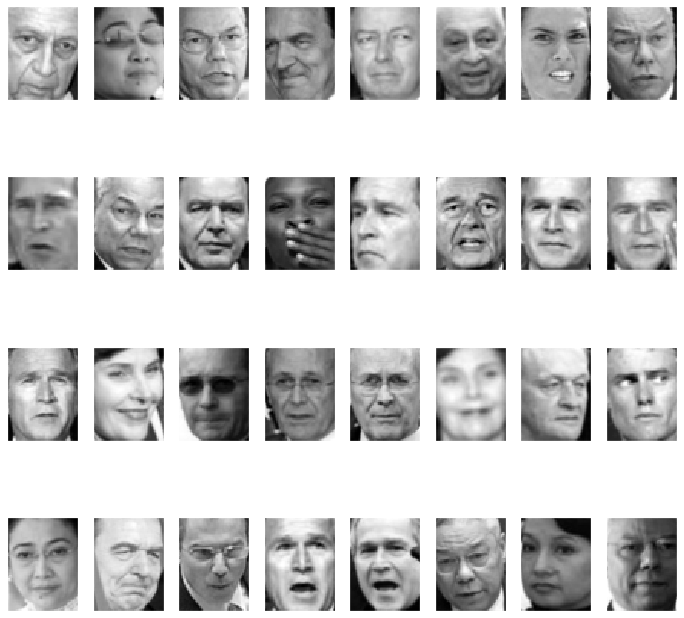

In [69]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]), figsize=(12,12))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

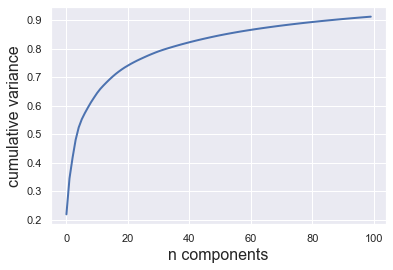

In [70]:
from sklearn.decomposition import PCA
model = PCA(100, svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

* It requires at least 100 components to explain 90% of the data
    - This means the information is intrinsically high dimensional
    - The data does not lie on a linear manifold

## Using LLE or Isomap

In [71]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2056, 2)

The output is a two-dimensional projection of all the input images. <br>
To get a better idea of what the projection tells us, let's define a function that will output image thumbnails at the locations of the projections:

In [72]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

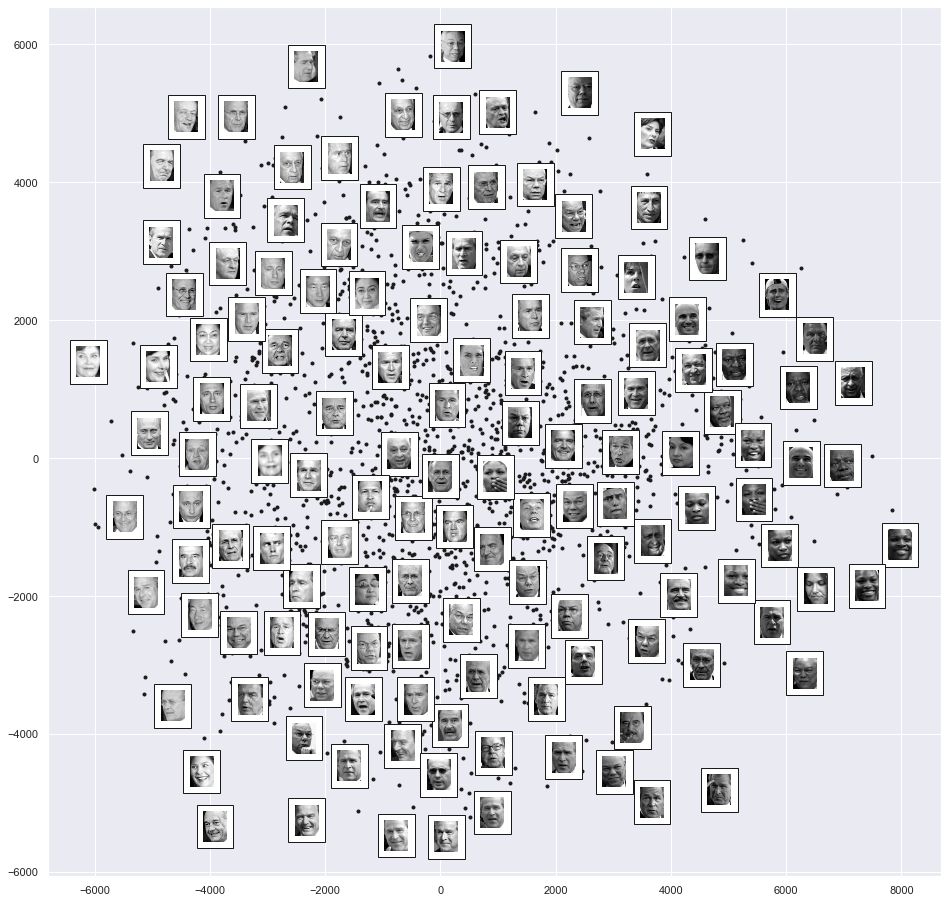

In [73]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

Takeaways: 
1. left-to-right contains the darkness of the image
2. Top-to-bottom contains the orientation of the images

We could use this manifold as features to classify these images

## Visualizing MNIST with manifold unfolding

In [74]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

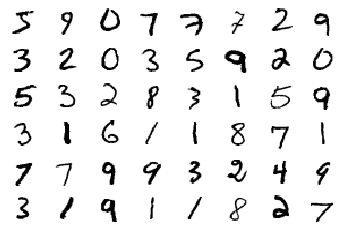

In [75]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

### Manifold Learning of MNIST
* Can only use 1/30 of the dataset due to computational time

In [76]:
# use only 1/30 of the data: full dataset takes a long time!
data = mnist.data[::30]
target = mnist.target[::30].astype(int)

model = Isomap(n_components=2)
proj = model.fit_transform(data)
scaler = sklearn.preprocessing.MinMaxScaler()
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet',10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

NameError: name 'sklearn' is not defined

The resulting scatter plot shows some of the relationships between the data points, but is a bit crowded.
We can gain more insight by looking at just a single number at a time:

In [ ]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target.astype(int) == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

The result gives you an idea of the variety of forms that the number "1" can take within the dataset.
The data lies along a broad curve in the projected space, which appears to trace the orientation of the digit.
As you move up the plot, you find ones that have hats and/or bases, though these are very sparse within the dataset.
The projection lets us identify outliers that have data issues: for example, pieces of the neighboring digits that snuck into the extracted images.

Now, this in itself may not be useful for the task of classifying digits, but it does help us get an understanding of the data, and may give us ideas about how to move forward, such as how we might want to preprocess the data before building a classification pipeline.

### Demonstration of T-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(16, 16))
plot_components(faces.data,
                model=TSNE(n_components=2),
                images=faces.images[:, ::2, ::2])

### Demonstration of Umap

In [ ]:
!pip install umap-learn

In [ ]:
import umap
import matplotlib.pyplot as plt
import numpy as np

reducer = umap.UMAP

fig, ax = plt.subplots(figsize=(16, 16))
plot_components(faces.data,
                model=reducer(n_components=2),
                images=faces.images[:, ::2, ::2])